###### https://www.kaggle.com/datasets/kartik2112/fraud-detection

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import datetime
warnings.filterwarnings(action='ignore')


from scipy.stats import chi2_contingency

## import Data

In [2]:
df_train = pd.read_csv('data/fraudTrain.csv',index_col=0)
df_test = pd.read_csv('data/fraudTest.csv',index_col=0)
df_train.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [3]:
print(df_train.shape)
print(df_test.shape)

(1296675, 22)
(555719, 22)


### --------------------------------------------------------------------------------------------------------------------------------

## clean and extract new features

In [4]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [5]:
categorical_col = [col for col in df_train if df_train[col].dtype == 'O' and df_train[col].nunique() <= df_train[col].shape[0]/5]
numerical_col = [col for col in df_train if col not in categorical_col]

In [6]:
def unique_value(df, col: list):
    for val in col:
        print("unique value in ", val, " is : ", df[val].nunique())
        print('--------')
        print(df[val].unique())
        print("------------------------------------")

In [7]:
unique_value(df_train, categorical_col)

unique value in  merchant  is :  693
--------
['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, Abernathy and Douglas' 'fraud_Torphy-Goyette'
 'fraud_Balistreri-Nader' 'fraud_Bahringer, Schoen and Corkery'
 'fraud_Hudson-Ratke' 'fraud_Heidenreich PLC' 'fraud_Halvors

In [8]:
categorical_col

['merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob']

In [9]:
print(df_train.describe())
print(df_test.describe())

             cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  1.284128e+07  5.109788e+00  1.377

##### 'trans_date_trans_time' converted into time, month, day and year

In [10]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['dob'] = pd.to_datetime(df_train['dob'])

df_train['transaction_year'] = df_train['trans_date_trans_time'].dt.year
df_train['transaction_month'] = df_train['trans_date_trans_time'].dt.month
df_train['transaction_day'] = df_train['trans_date_trans_time'].dt.day
df_train['transaction_hour'] = df_train['trans_date_trans_time'].dt.hour

#-------------------------------------------------------------------------------------------

df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['dob'] = pd.to_datetime(df_test['dob'])

df_test['transaction_year'] = df_test['trans_date_trans_time'].dt.year
df_test['transaction_month'] = df_test['trans_date_trans_time'].dt.month
df_test['transaction_day'] = df_test['trans_date_trans_time'].dt.day
df_test['transaction_hour'] = df_test['trans_date_trans_time'].dt.hour



##### create age feature of credit card hodler

In [12]:
age_of_holder = []
today = datetime.date.today()

for val in df_train['dob']:
    birth_date = val.date()  # Convert Timestamp to date
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    age_of_holder.append(age)

df_train['age_of_holder'] = age_of_holder

# Repeat for df_test
age_of_holder = []
for val in df_test['dob']:
    birth_date = val.date()  # Convert Timestamp to date
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    age_of_holder.append(age)

df_test['age_of_holder'] = age_of_holder

##### drop trans_date_trans_time & dob

In [13]:
df_test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
df_train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [15]:
categorical_col = [col for col in df_train if df_train[col].nunique() <= df_train[col].shape[0]/10]
numerical_col = [col for col in df_train if col not in categorical_col]

In [16]:
categorical_col

['cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'is_fraud',
 'transaction_year',
 'transaction_month',
 'transaction_day',
 'transaction_hour',
 'age_of_holder']

In [18]:
print(df_train.index.duplicated().sum())
df = df_train.reset_index(drop=True)
print(df_train.index.duplicated().sum())

0
0


### ----------------------------------------------------------------------------------------------------------------------

## EDA

In [19]:
def plot_categorical_data(df, col, value_col=None, top_n=30, kind='bar',
                         title=None, xlabel=None, ylabel=None,
                         figsize=(14, 3), color='skyblue', edgecolor='black',
                         rotation=45, ha='right', va='top'):
    
    # Filter for fraud if specified
    if value_col:
        df = df[df['is_fraud'] == 1]

    # Prepare data
    if value_col:
        data = df.groupby(col)[value_col].sum().sort_values(ascending=False)
    else:
        data = df[col].value_counts()

    # Combine top and bottom N categories
    top_bottom = pd.concat([data.head(top_n), data.tail(top_n)])

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    if kind == 'bar':
        sns.barplot(x=top_bottom.index, y=top_bottom.values, color=color, edgecolor=edgecolor, ax=ax)
    elif kind in ['count', 'box', 'violin', 'boxen']:
        # For other plot types, you might need to adjust the data or plotting method
        sns.catplot(x=col, data=df, kind=kind, ax=ax)
    else:
        raise ValueError(f"Invalid plot kind: {kind}")

    ax.set_title(title or f'Distribution of {col}')
    ax.set_xlabel(xlabel or col)
    ax.set_ylabel(ylabel or ('Count' if value_col is None else value_col))
    plt.xticks(rotation=rotation, ha=ha, va=va)

    plt.show()


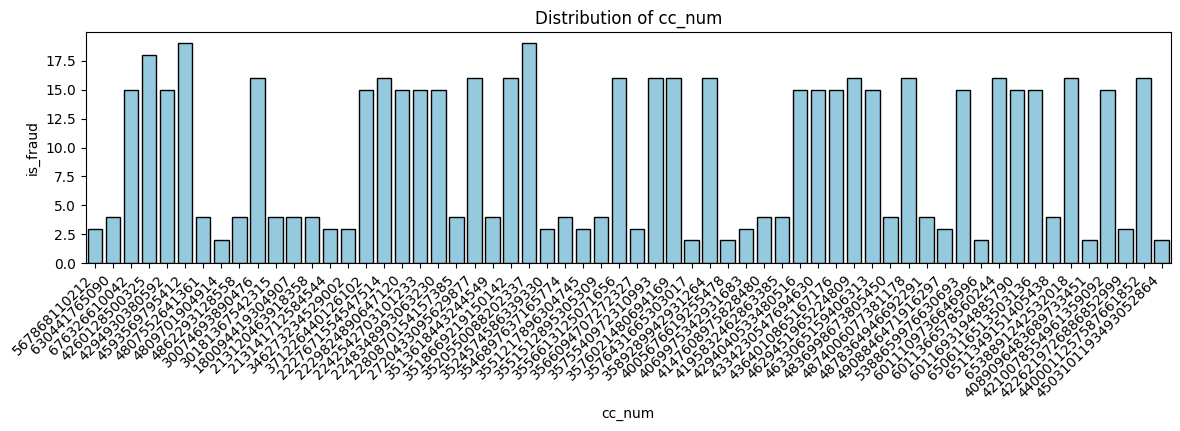

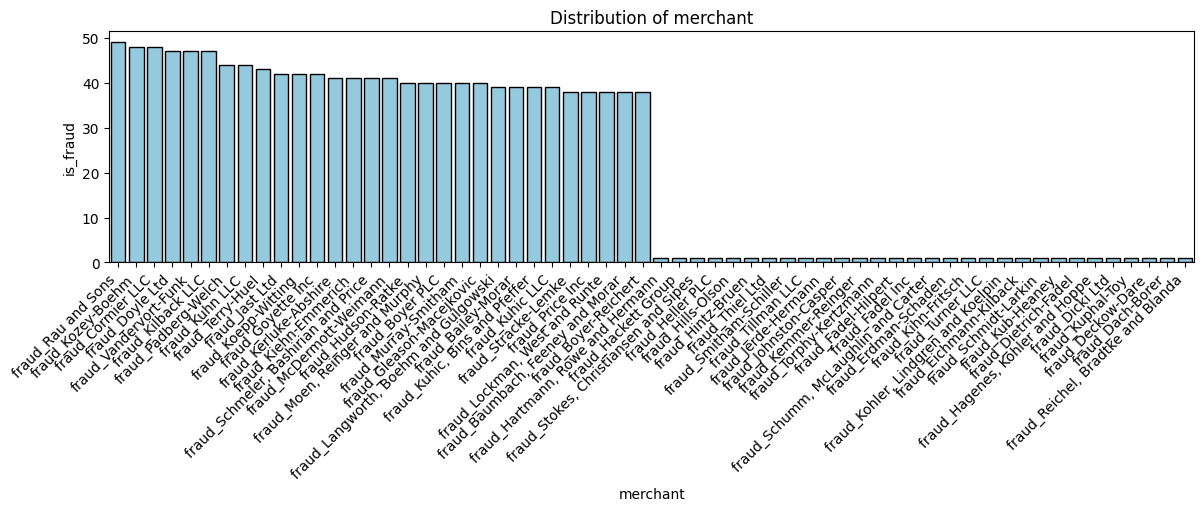

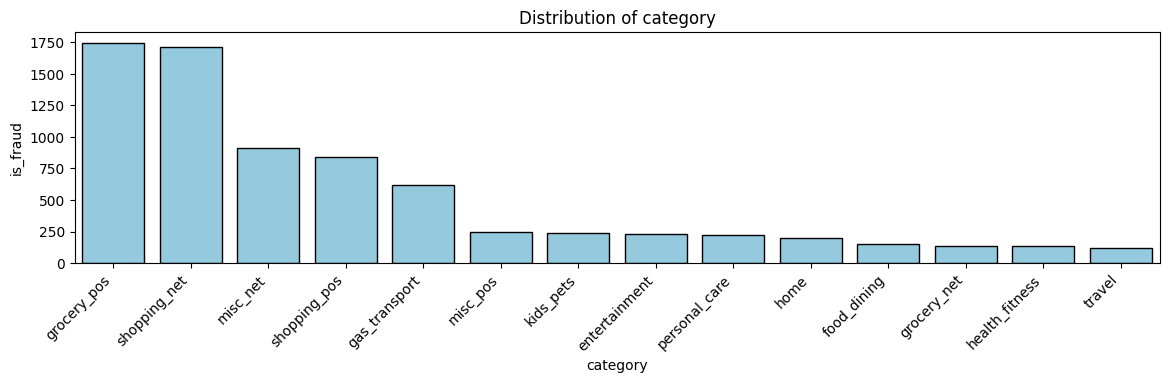

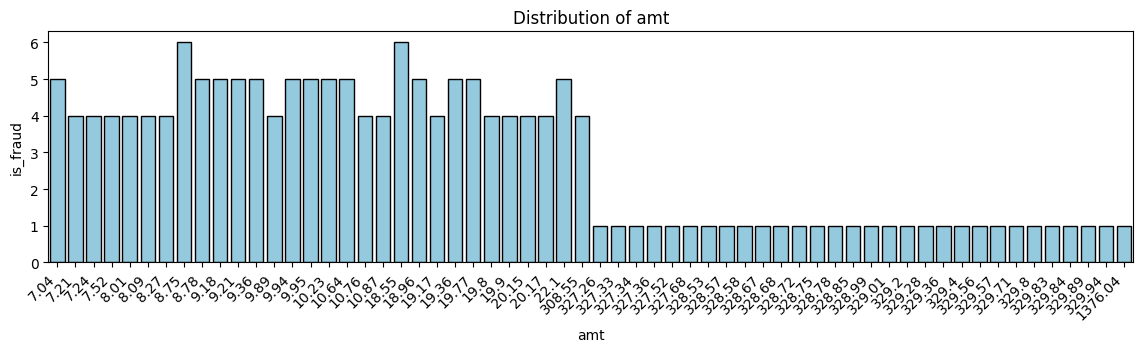

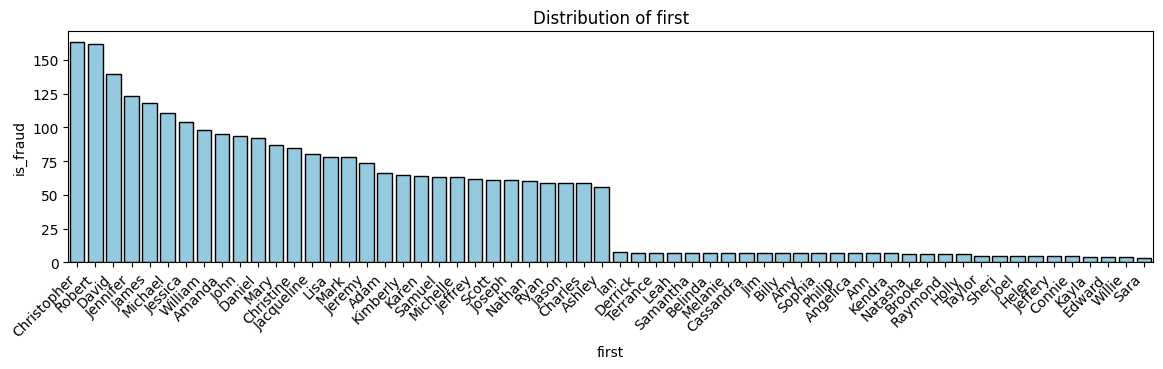

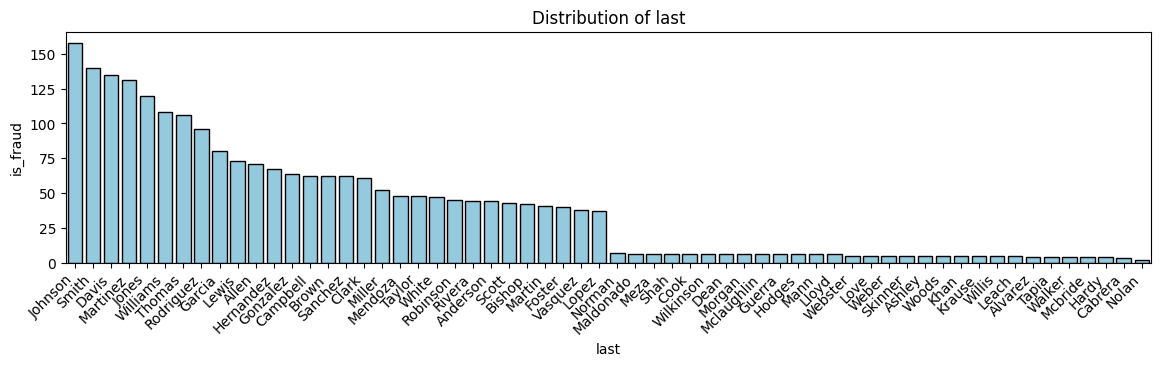

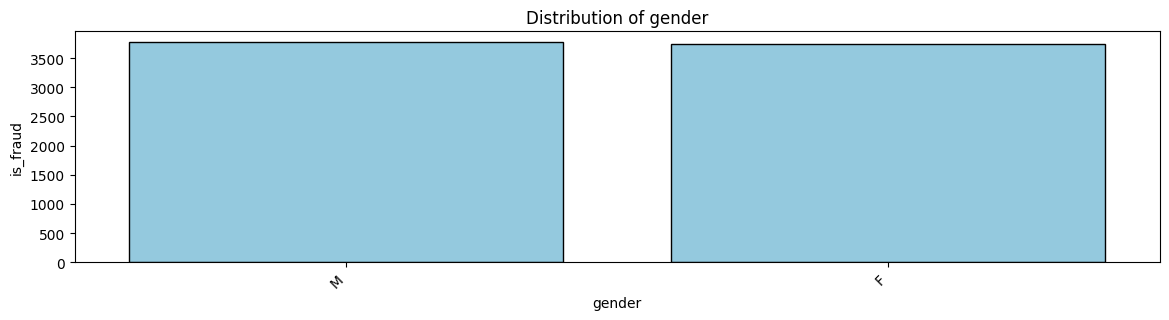

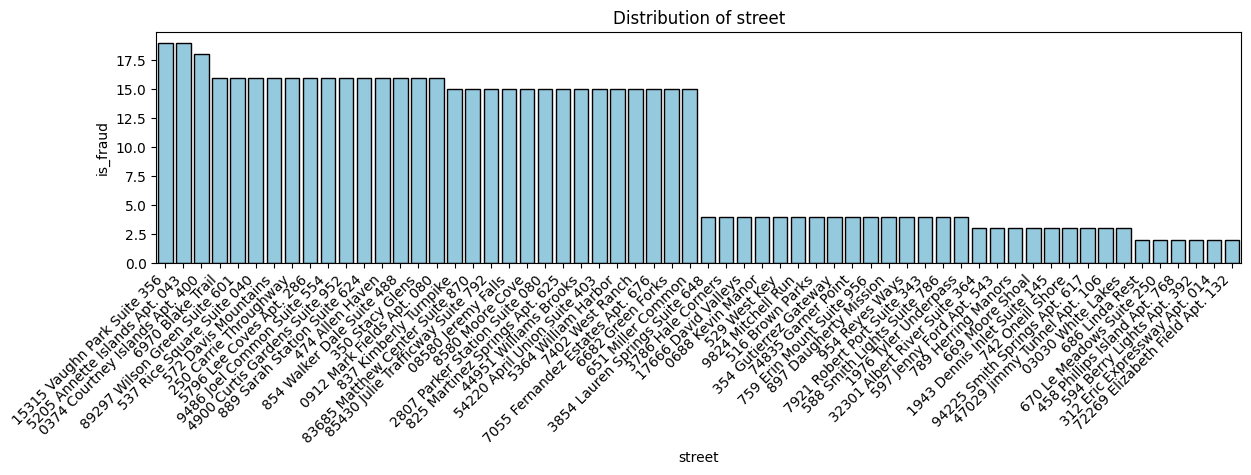

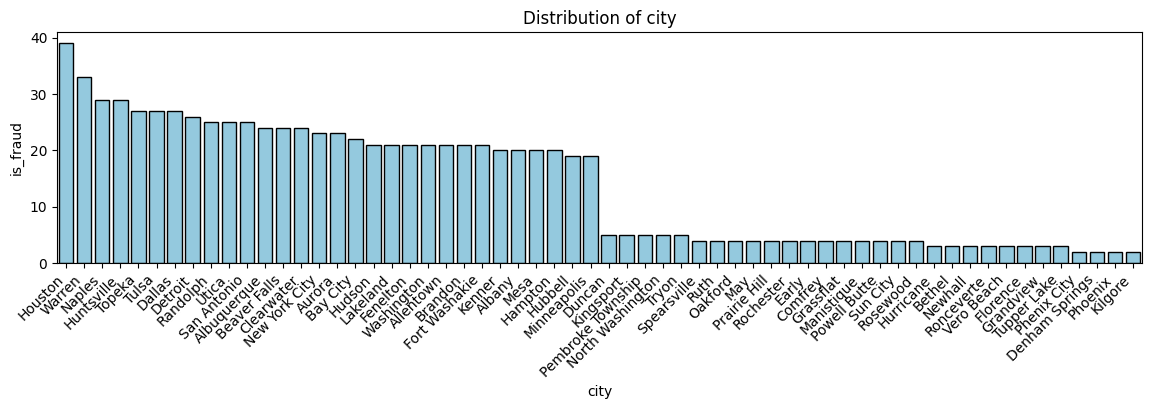

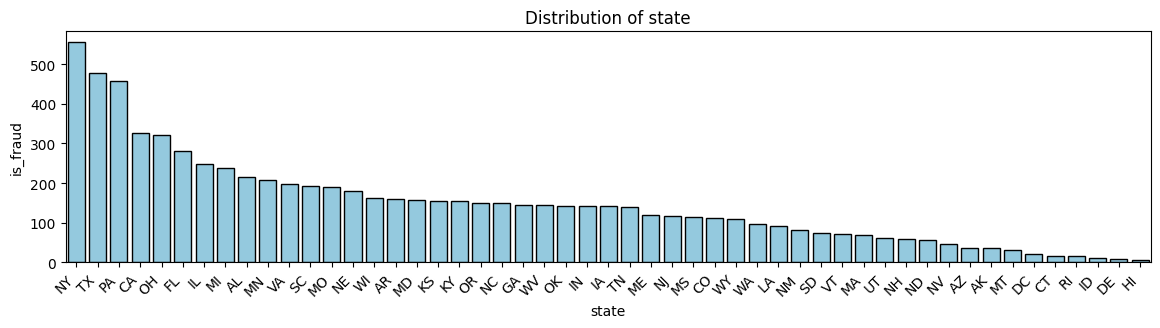

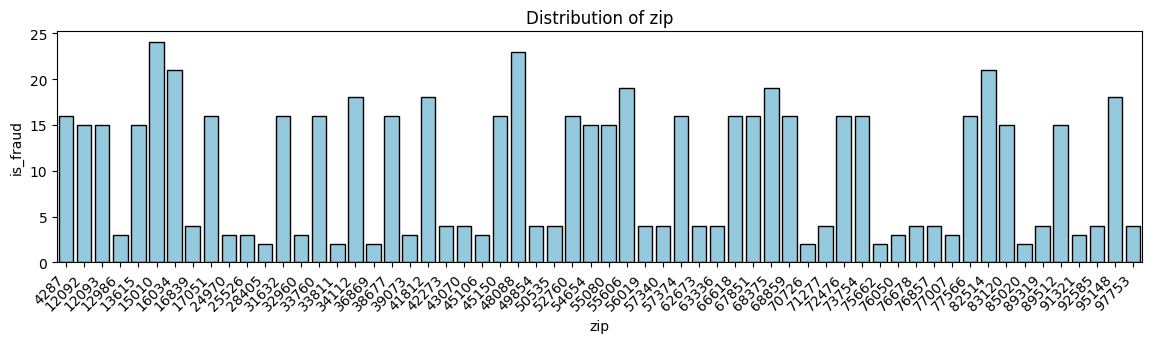

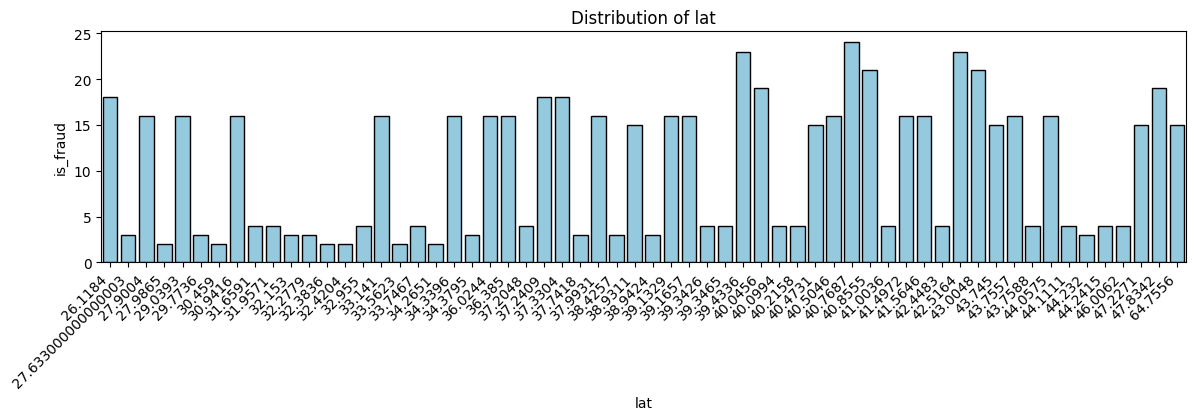

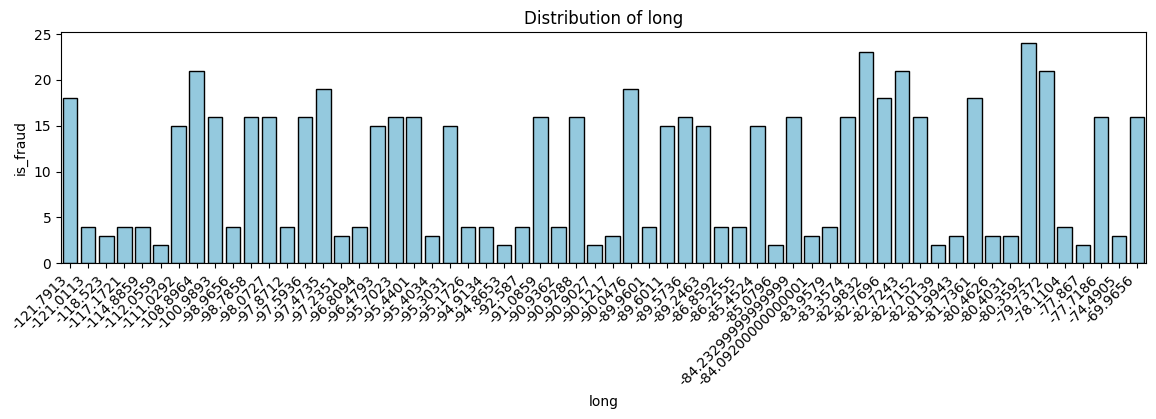

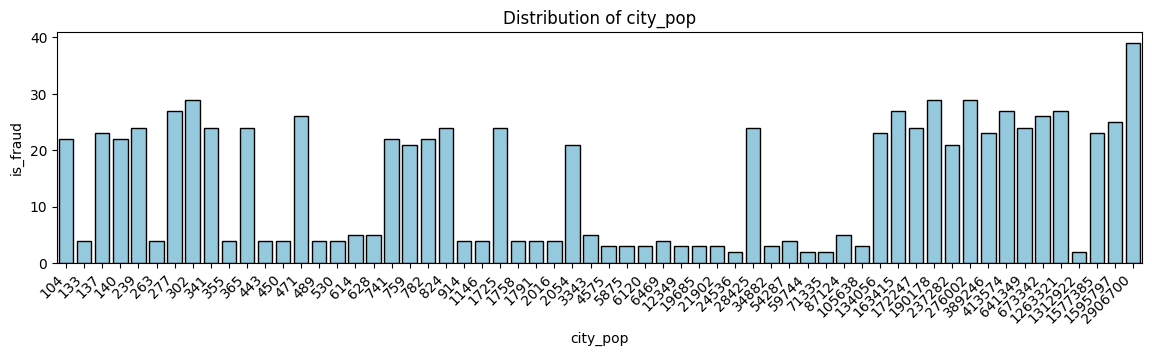

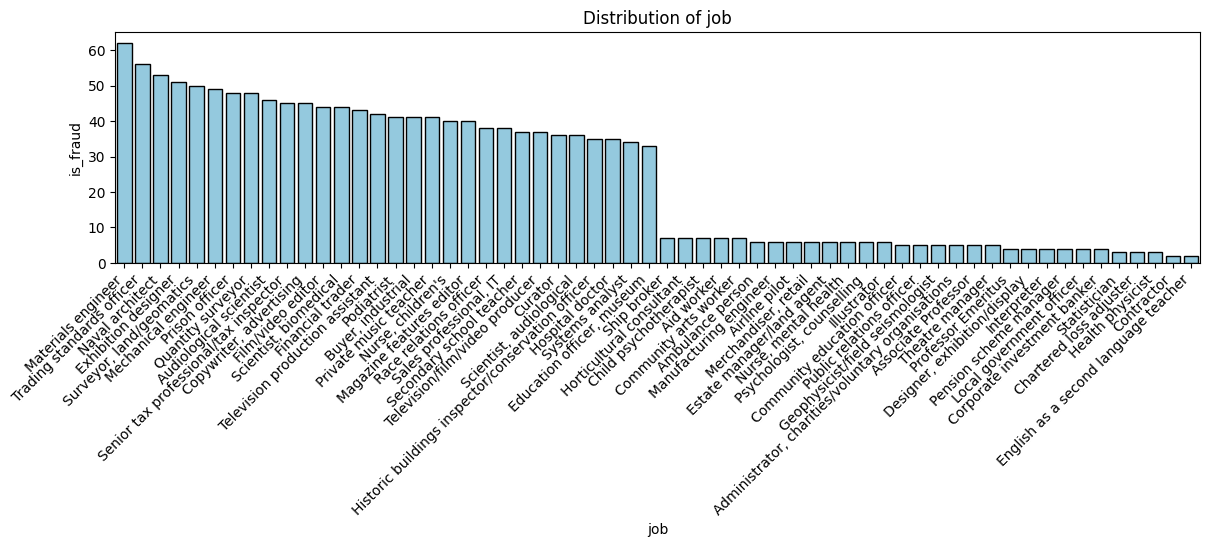

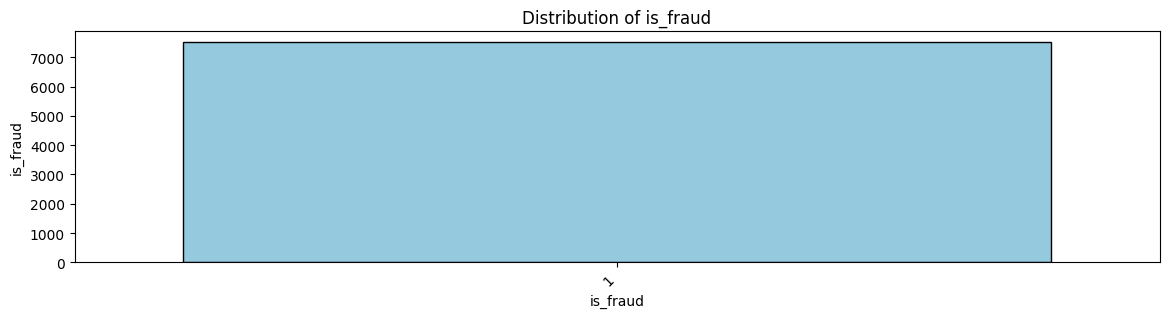

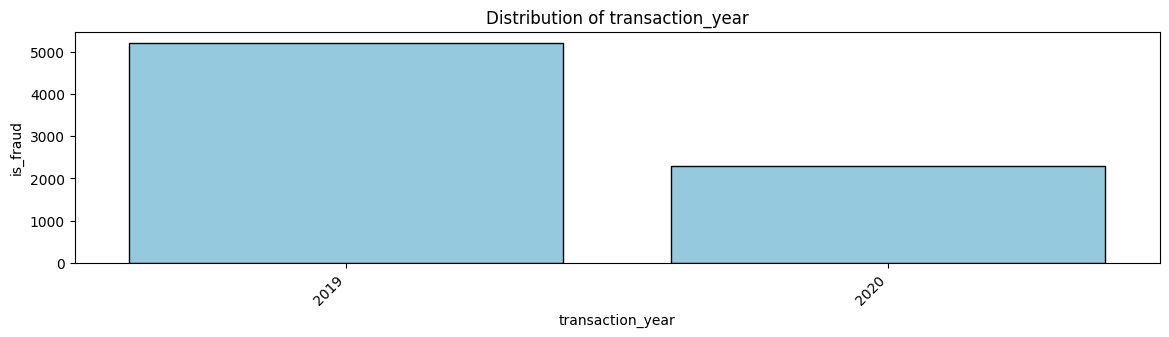

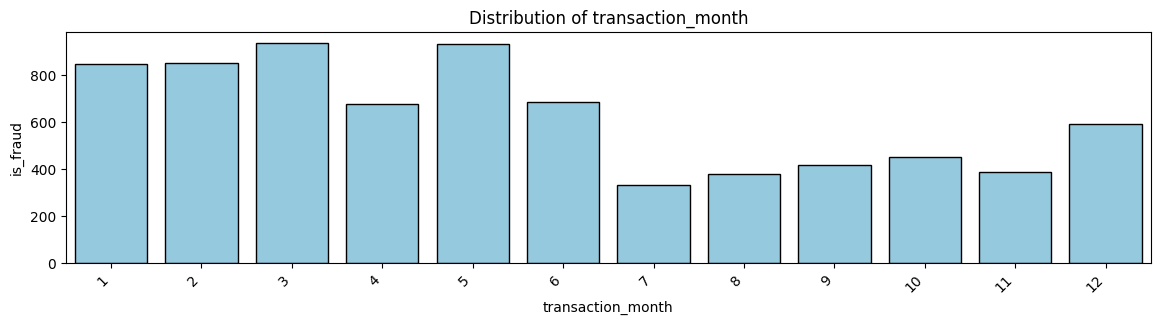

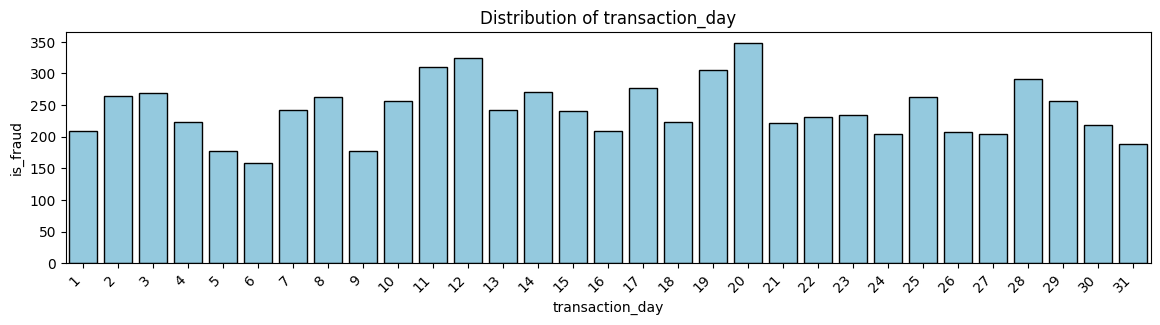

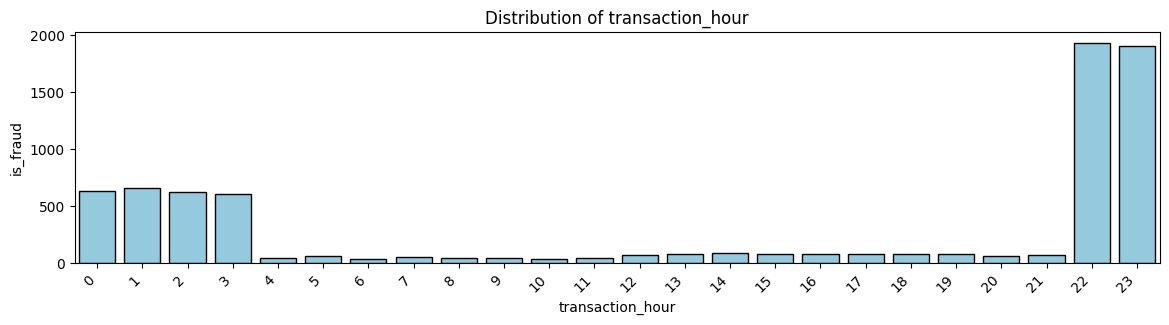

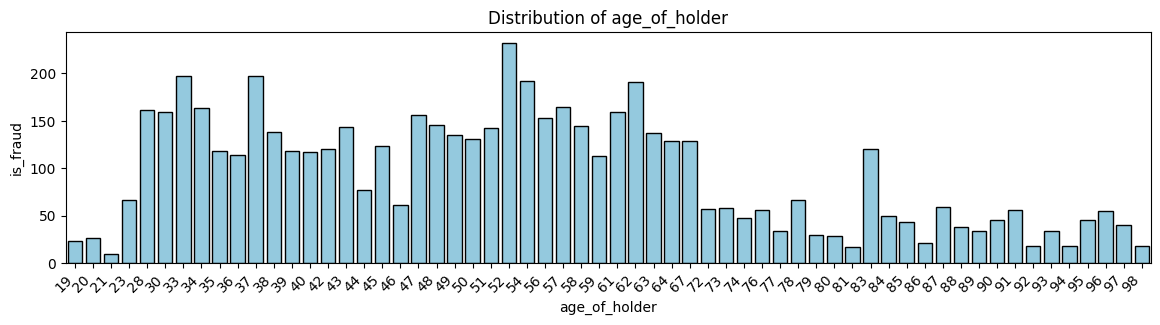

In [20]:
for val in categorical_col:
    plot_categorical_data(df, val,'is_fraud', top_n=30)

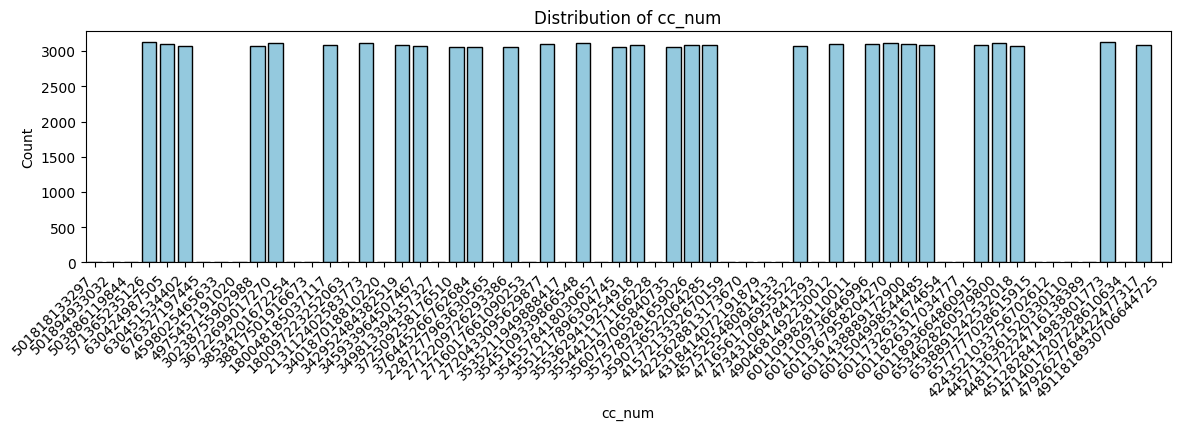

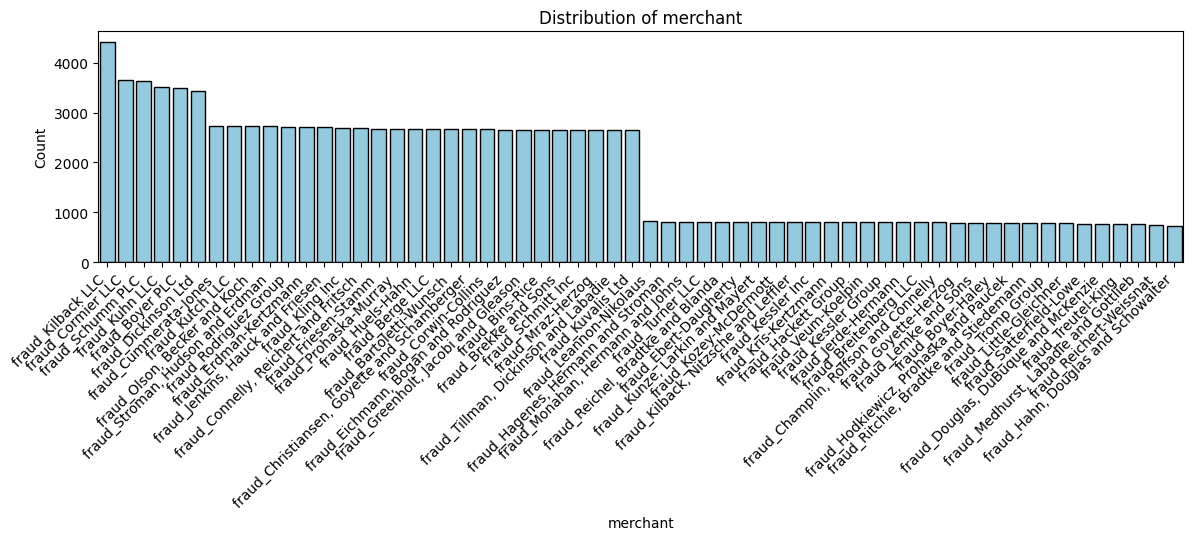

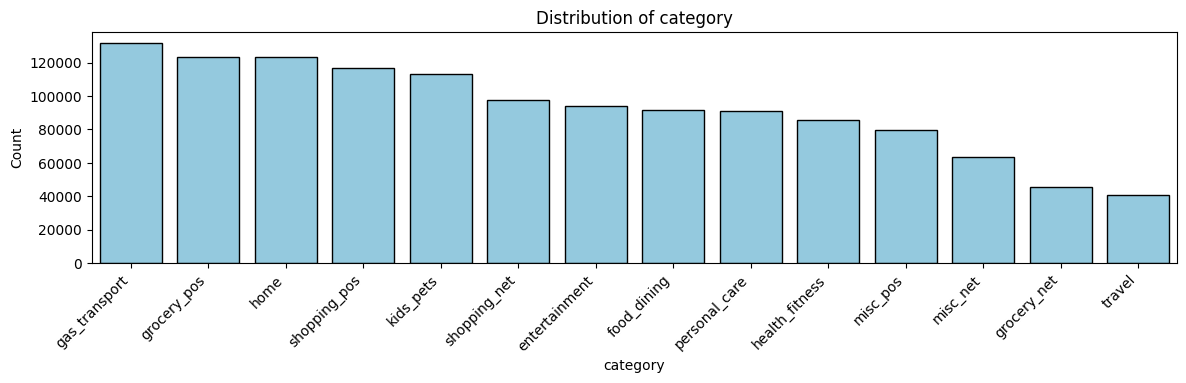

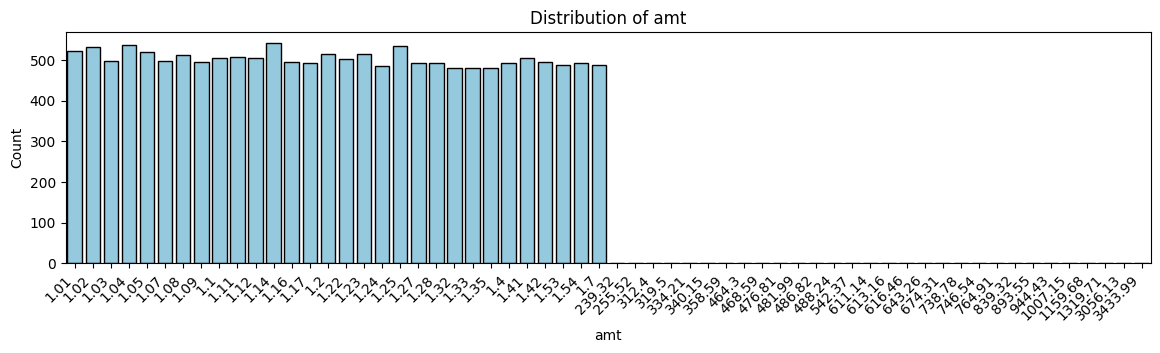

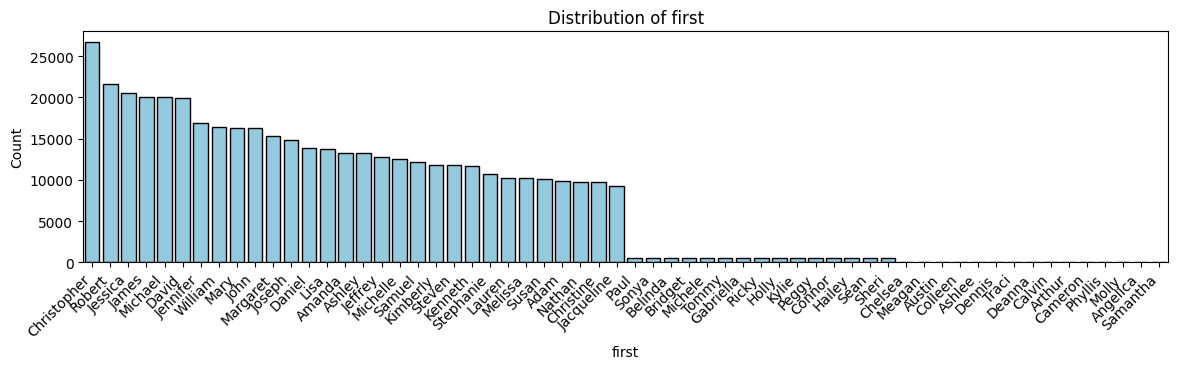

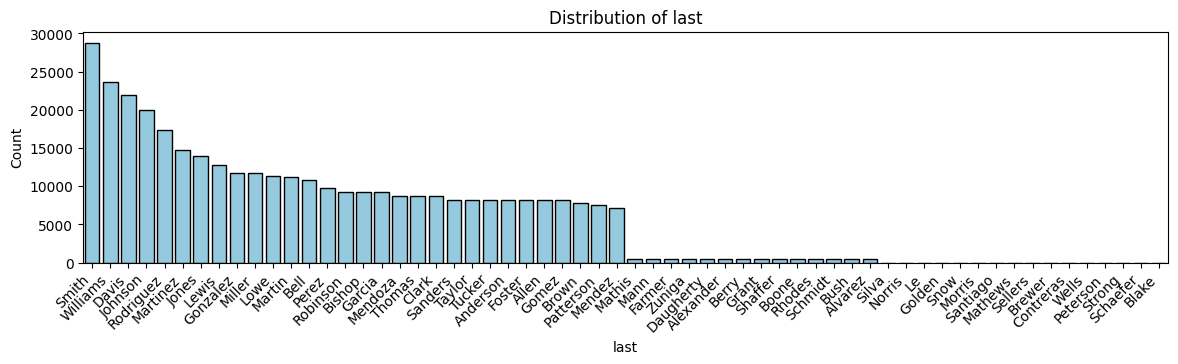

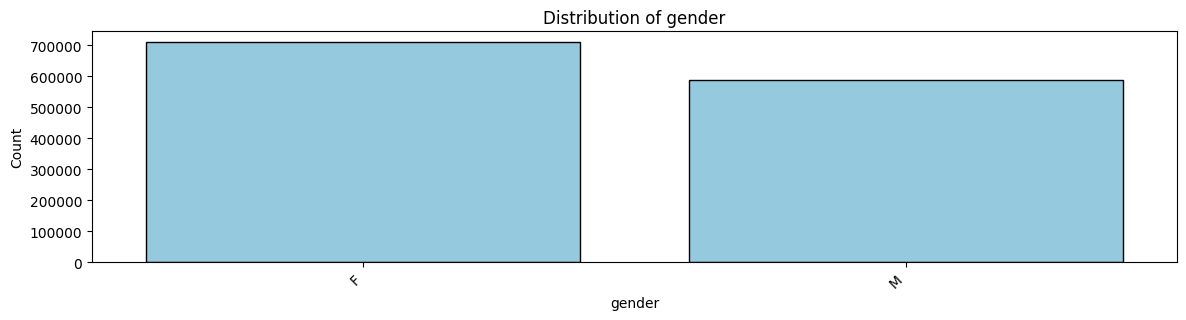

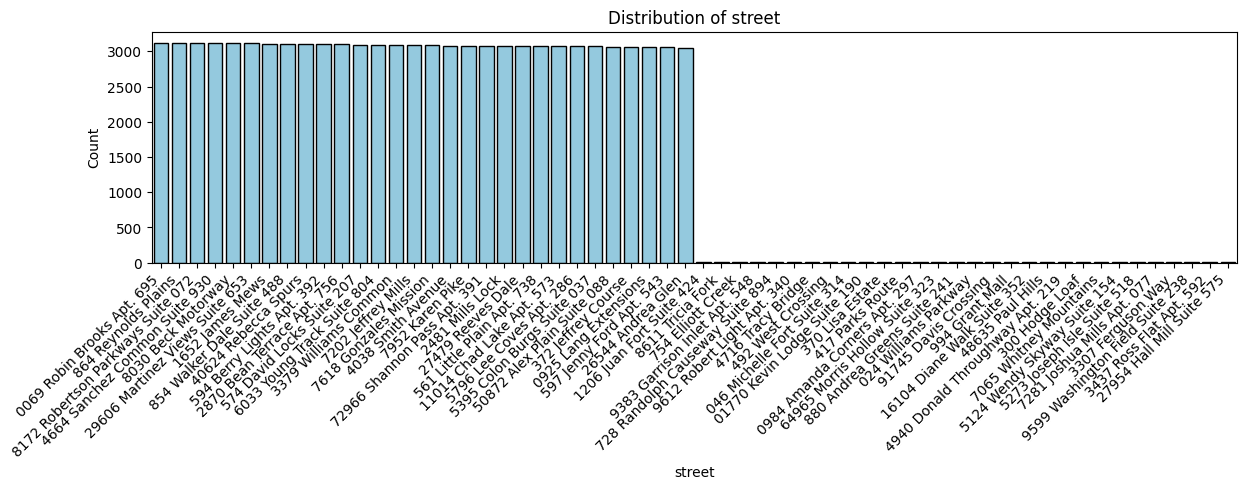

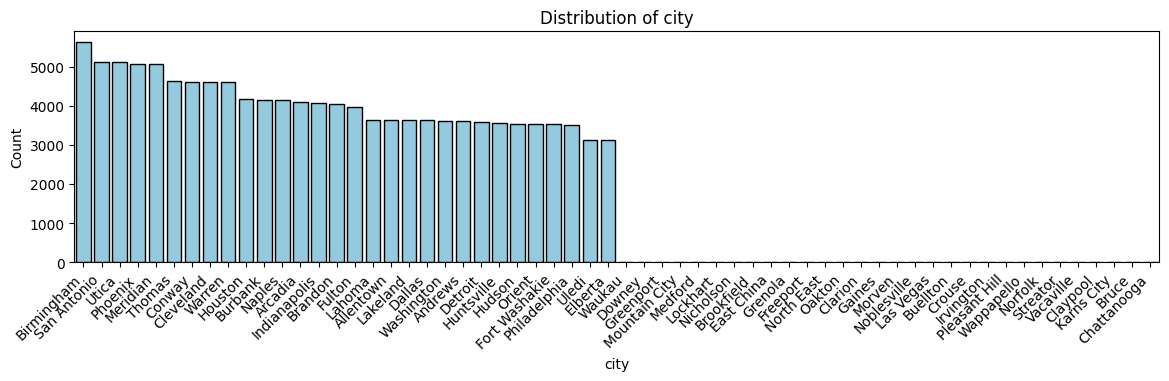

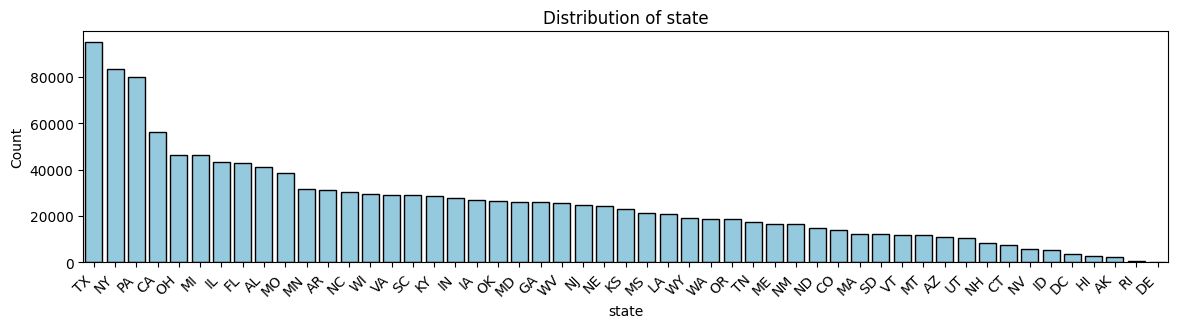

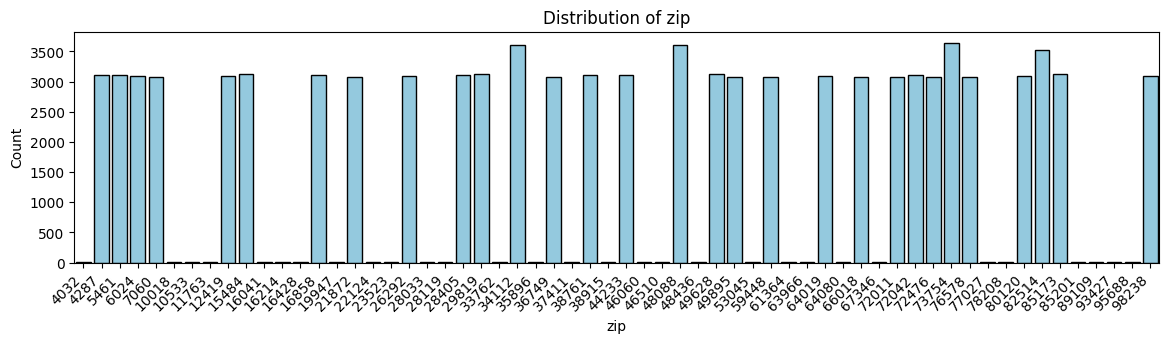

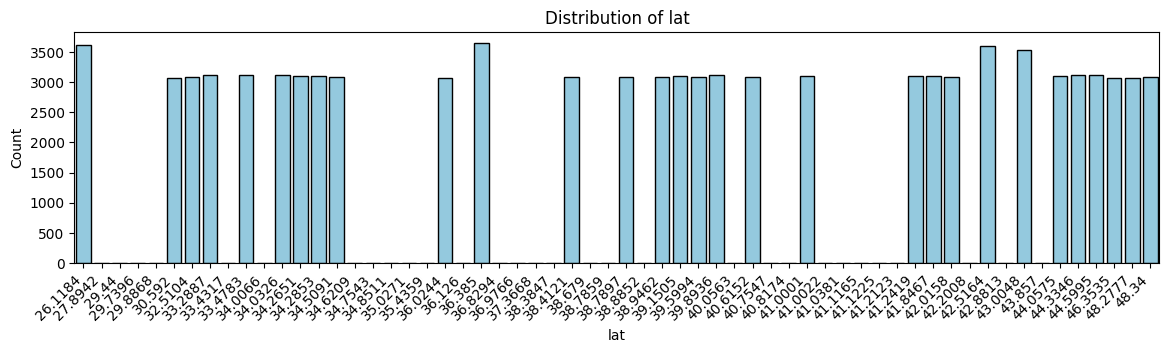

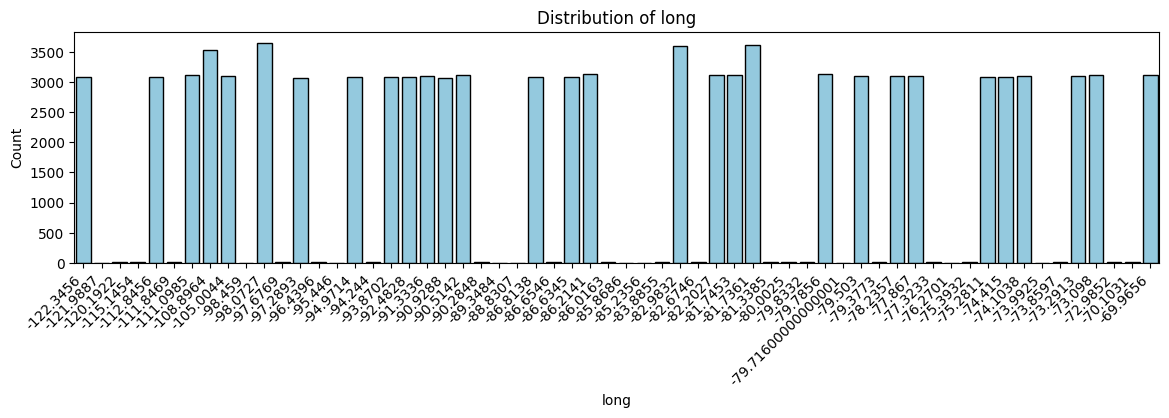

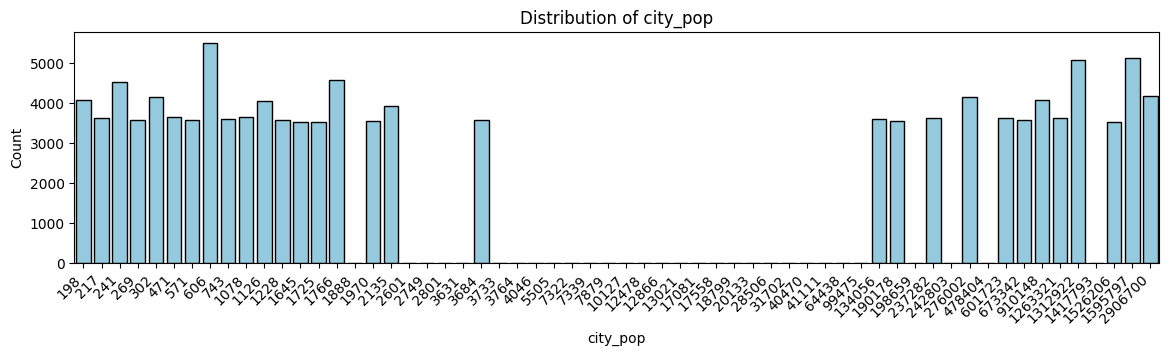

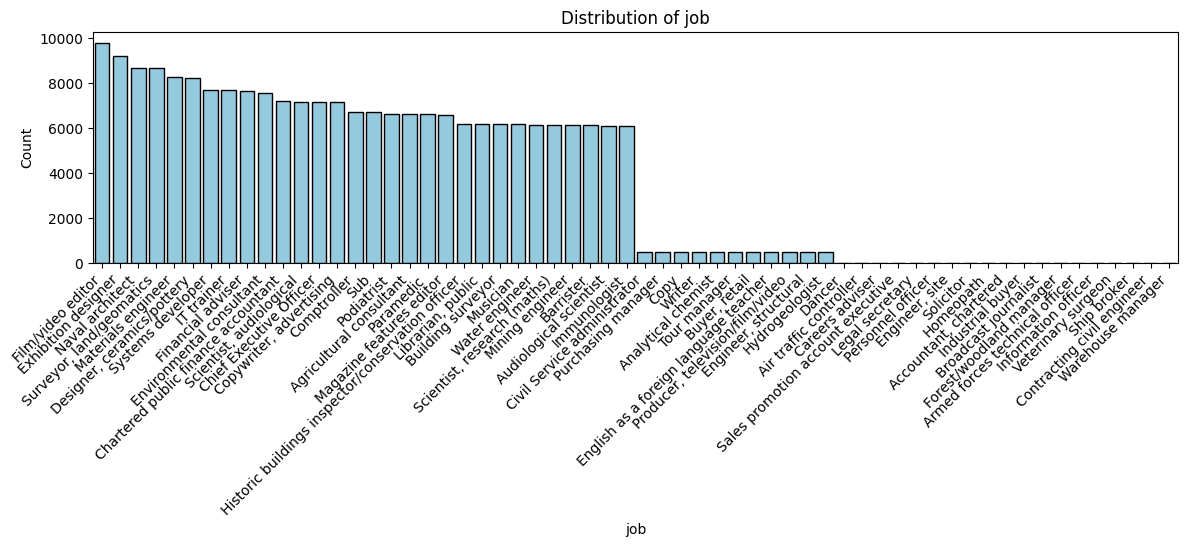

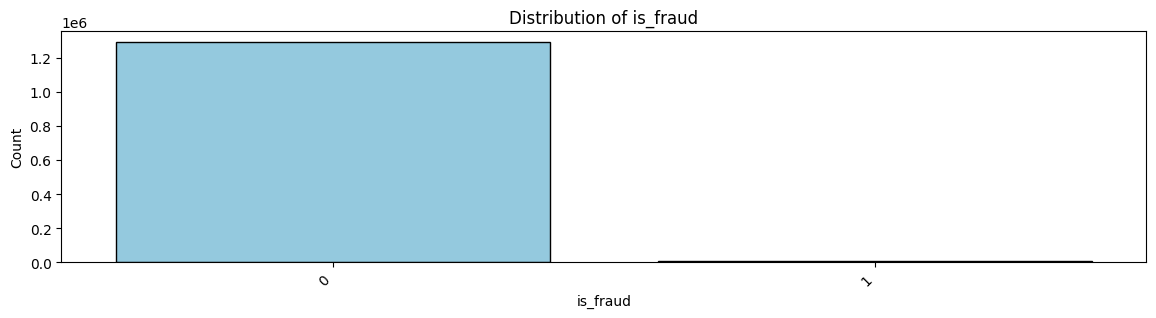

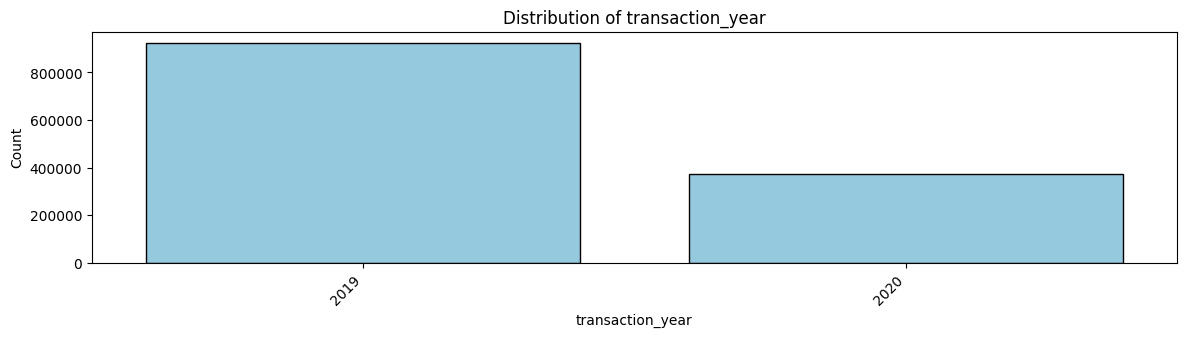

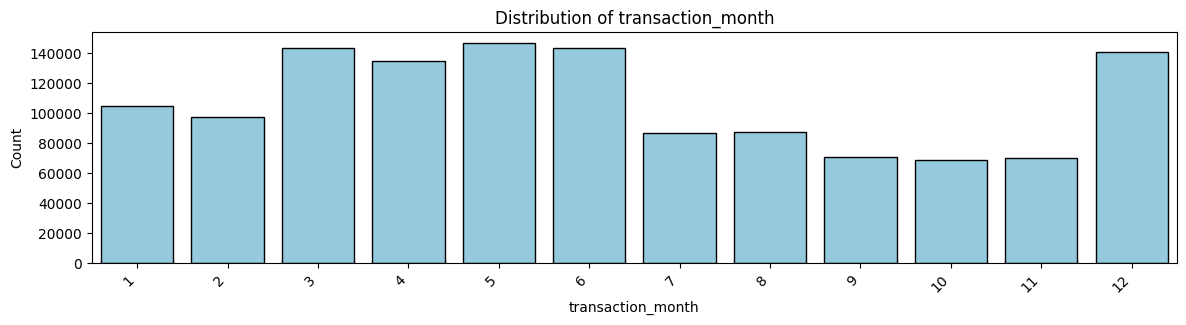

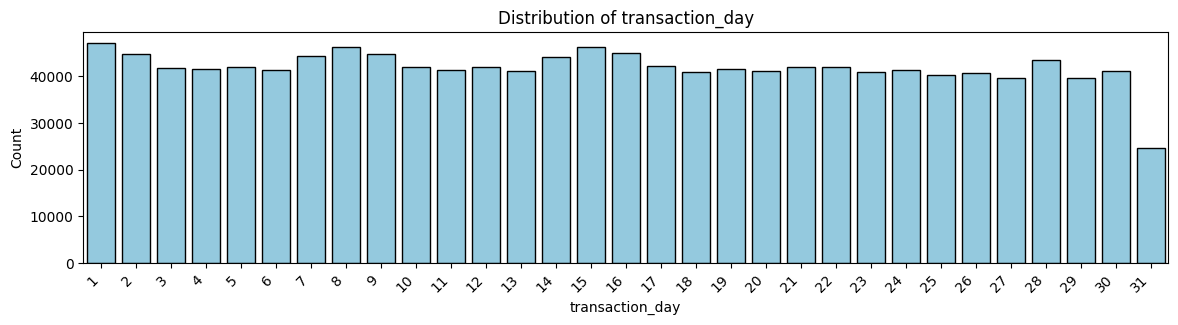

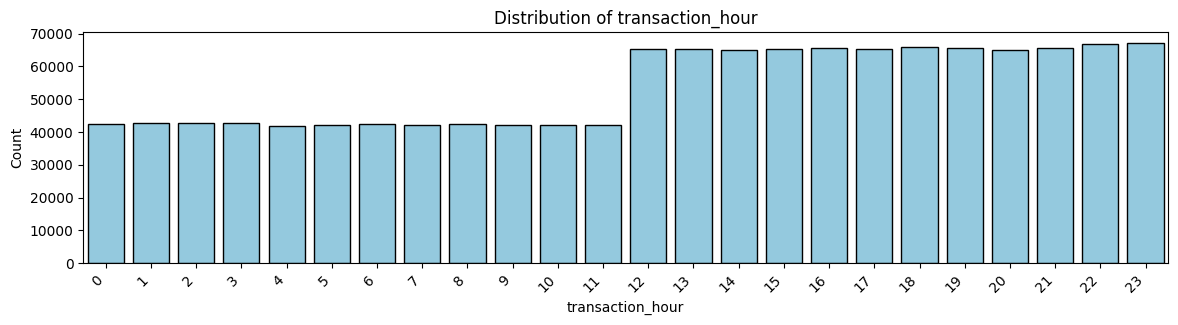

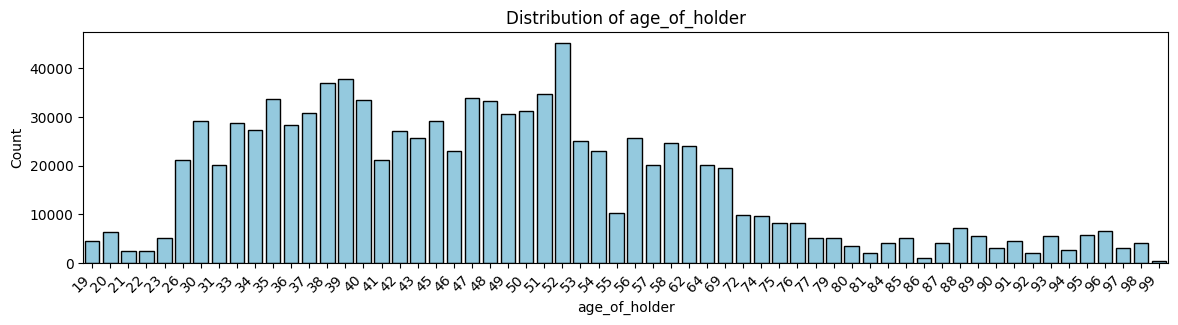

In [21]:
for val in categorical_col:
    plot_categorical_data(df, val, top_n=30)

In [22]:
df_train.shape

(1296675, 25)

In [23]:
df_test.shape

(555719, 25)

##### transaction_year because this data is of 2019 and 20 so it's show only this 2 dates

In [24]:
df_train.drop('transaction_year', axis=1, inplace=True)
df_test.drop('transaction_year', axis=1, inplace=True)

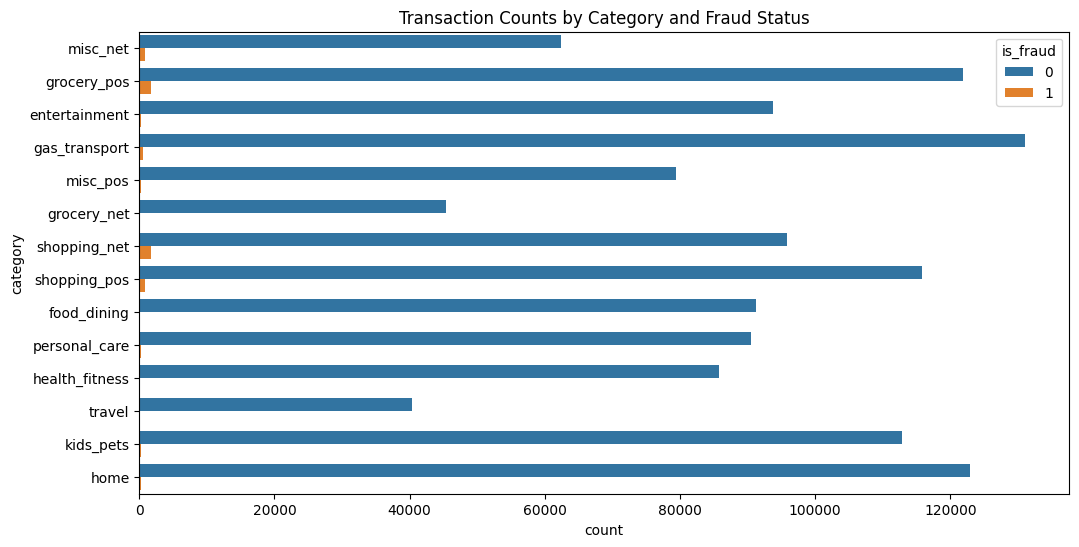

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

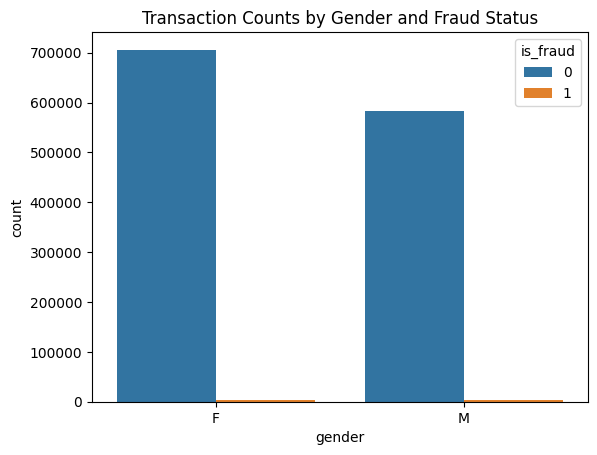

In [26]:
## The 0 represent male and 1 represent female
sns.countplot(data=df, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

In [27]:
df_train.drop(['cc_num','first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
df_test.drop(['cc_num','first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le

for col in label_encode_cols:
    le = LabelEncoder()
    
    df_test[col] = le.fit_transform(df_test[col])
    label_encoders[col] = le

### --------------------------------------------------------------------------------------------------------------------------

In [33]:
df_train.head(10)

merchant  category     amt  gender  state    zip      lat      long  \
0       514         8    4.97       0     27  28654  36.0788  -81.1781   
1       241         4  107.23       0     47  99160  48.8878 -118.2105   
2       390         0  220.11       1     13  83252  42.1808 -112.2620   
3       360         2   45.00       1     26  59632  46.2306 -112.1138   
4       297         9   41.96       1     45  24433  38.4207  -79.4629   
5       607         2   94.63       0     38  18917  40.3750  -75.2045   
6       534         3   44.54       0     16  67851  37.9931 -100.9893   
7       107         2   71.65       1     45  22824  38.8432  -78.6003   
8       250         9    4.27       0     38  15665  40.3359  -79.6607   
9       563         4  198.39       0     42  37040  36.5220  -87.3490   

   city_pop  job   unix_time  merch_lat  merch_long  is_fraud  \
0      3495  370  1325376018  36.011293  -82.048315         0   
1       149  428  1325376044  49.159047 -118.186462         0   
2      4154  307  1325376051  43.150704 -112.154481         0   
3      1939  328  1325376076  47.034331 -112.561071         0   
4        99  116  1325376186  38.674999  -78.632459         0   
5      2158  479  1325376248  40.653382  -76.152667         0   
6      2691   29  1325376282  37.162705 -100.153370         0   
7      6018  127  1325376308  38.948089  -78.540296         0   
8      1472  375  1325376318  40.351813  -79.958146         0   
9    151785  329  1325376361  37.179198  -87.485381         0   

   transaction_month  transaction_day  transaction_hour  age_of_holder  
0                  1                1                 0             36  
1                  1                1                 0             46  
2                  1                1                 0             62  
3                  1                1                 0             57  
4                  1                1                 0             38  
5                  1                1                 0             63  
6                  1                1                 0             30  
7                  1                1                 0             76  
8                  1                1                 0             83  
9                  1                1                 0             50

In [34]:
df_test.head()

merchant  category    amt  gender  state    zip      lat      long  \
0       319        10   2.86       1     39  29209  33.9659  -80.9355   
1       591        10  29.84       0     43  84002  40.3207 -110.4360   
2       611         5  41.28       0     33  11710  40.6729  -73.5365   
3       222         9  60.05       1      8  32780  28.5697  -80.8191   
4       292        13   3.19       1     21  49632  44.2529  -85.0170   

   city_pop  job   unix_time  merch_lat  merch_long  is_fraud  \
0    333497  275  1371816865  33.986391  -81.200714         0   
1       302  392  1371816873  39.450498 -109.960431         0   
2     34496  259  1371816893  40.495810  -74.196111         0   
3     54767  407  1371816915  28.812398  -80.883061         0   
4      1126  196  1371816917  44.959148  -85.884734         0   

   transaction_month  transaction_day  transaction_hour  age_of_holder  
0                  6               21                12             56  
1                  6               21                12             34  
2                  6               21                12             53  
3                  6               21                12             37  
4                  6               21                12             69

In [35]:
df_train.describe()

merchant      category           amt        gender         state  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   3.428585e+02  6.227787e+00  7.035104e+01  4.525513e-01  2.667728e+01   
std    2.009519e+02  3.913443e+00  1.603160e+02  4.977437e-01  1.433098e+01   
min    0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.650000e+02  3.000000e+00  9.650000e+00  0.000000e+00  1.500000e+01   
50%    3.460000e+02  6.000000e+00  4.752000e+01  0.000000e+00  2.800000e+01   
75%    5.140000e+02  1.000000e+01  8.314000e+01  1.000000e+00  3.800000e+01   
max    6.920000e+02  1.300000e+01  2.894890e+04  1.000000e+00  5.000000e+01   

                zip           lat          long      city_pop           job  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.880067e+04  3.853762e+01 -9.022634e+01  8.882444e+04  2.511734e+02   
std    2.689322e+04  5.075808e+00  1.375908e+01  3.019564e+05  1.401094e+02   
min    1.257000e+03  2.002710e+01 -1.656723e+02  2.300000e+01  0.000000e+00   
25%    2.623700e+04  3.462050e+01 -9.679800e+01  7.430000e+02  1.310000e+02   
50%    4.817400e+04  3.935430e+01 -8.747690e+01  2.456000e+03  2.510000e+02   
75%    7.204200e+04  4.194040e+01 -8.015800e+01  2.032800e+04  3.740000e+02   
max    9.978300e+04  6.669330e+01 -6.795030e+01  2.906700e+06  4.930000e+02   

          unix_time     merch_lat    merch_long      is_fraud  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03   
std    1.284128e+07  5.109788e+00  1.377109e+01  7.586269e-02   
min    1.325376e+09  1.902779e+01 -1.666712e+02  0.000000e+00   
25%    1.338751e+09  3.473357e+01 -9.689728e+01  0.000000e+00   
50%    1.349250e+09  3.936568e+01 -8.743839e+01  0.000000e+00   
75%    1.359385e+09  4.195716e+01 -8.023680e+01  0.000000e+00   
max    1.371817e+09  6.751027e+01 -6.695090e+01  1.000000e+00   

       transaction_month  transaction_day  transaction_hour  age_of_holder  
count       1.296675e+06     1.296675e+06      1.296675e+06   1.296675e+06  
mean        6.142150e+00     1.558798e+01      1.280486e+01   5.030961e+01  
std         3.417703e+00     8.829121e+00      6.817824e+00   1.738903e+01  
min         1.000000e+00     1.000000e+00      0.000000e+00   1.900000e+01  
25%         3.000000e+00     8.000000e+00      7.000000e+00   3.700000e+01  
50%         6.000000e+00     1.500000e+01      1.400000e+01   4.800000e+01  
75%         9.000000e+00     2.300000e+01      1.900000e+01   6.100000e+01  
max         1.200000e+01     3.100000e+01      2.300000e+01   9.900000e+01

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
scaler = StandardScaler()

# If you're standardizing multiple columns
columns_to_standardize = ['zip', 'city_pop', 'unix_time']
df_train[['zip', 'city_pop', 'unix_time']] = scaler.fit_transform(df_train[columns_to_standardize])
df_test[['zip', 'city_pop', 'unix_time']] = scaler.fit_transform(df_test[columns_to_standardize])

In [38]:
df_train.describe()

merchant      category           amt        gender         state  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   3.428585e+02  6.227787e+00  7.035104e+01  4.525513e-01  2.667728e+01   
std    2.009519e+02  3.913443e+00  1.603160e+02  4.977437e-01  1.433098e+01   
min    0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.650000e+02  3.000000e+00  9.650000e+00  0.000000e+00  1.500000e+01   
50%    3.460000e+02  6.000000e+00  4.752000e+01  0.000000e+00  2.800000e+01   
75%    5.140000e+02  1.000000e+01  8.314000e+01  1.000000e+00  3.800000e+01   
max    6.920000e+02  1.300000e+01  2.894890e+04  1.000000e+00  5.000000e+01   

                zip           lat          long      city_pop           job  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -3.358252e-17  3.853762e+01 -9.022634e+01 -1.350753e-18  2.511734e+02   
std    1.000000e+00  5.075808e+00  1.375908e+01  1.000000e+00  1.401094e+02   
min   -1.767869e+00  2.002710e+01 -1.656723e+02 -2.940871e-01  0.000000e+00   
25%   -8.390099e-01  3.462050e+01 -9.679800e+01 -2.917027e-01  1.310000e+02   
50%   -2.330220e-02  3.935430e+01 -8.747690e+01 -2.860297e-01  2.510000e+02   
75%    8.642080e-01  4.194040e+01 -8.015800e+01 -2.268423e-01  3.740000e+02   
max    1.895732e+00  6.669330e+01 -6.795030e+01  9.332066e+00  4.930000e+02   

          unix_time     merch_lat    merch_long      is_fraud  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -2.571352e-15  3.853734e+01 -9.022646e+01  5.788652e-03   
std    1.000000e+00  5.109788e+00  1.377109e+01  7.586269e-02   
min   -1.858664e+00  1.902779e+01 -1.666712e+02  0.000000e+00   
25%   -8.171226e-01  3.473357e+01 -9.689728e+01  0.000000e+00   
50%    4.758308e-04  3.936568e+01 -8.743839e+01  0.000000e+00   
75%    7.897767e-01  4.195716e+01 -8.023680e+01  0.000000e+00   
max    1.757862e+00  6.751027e+01 -6.695090e+01  1.000000e+00   

       transaction_month  transaction_day  transaction_hour  age_of_holder  
count       1.296675e+06     1.296675e+06      1.296675e+06   1.296675e+06  
mean        6.142150e+00     1.558798e+01      1.280486e+01   5.030961e+01  
std         3.417703e+00     8.829121e+00      6.817824e+00   1.738903e+01  
min         1.000000e+00     1.000000e+00      0.000000e+00   1.900000e+01  
25%         3.000000e+00     8.000000e+00      7.000000e+00   3.700000e+01  
50%         6.000000e+00     1.500000e+01      1.400000e+01   4.800000e+01  
75%         9.000000e+00     2.300000e+01      1.900000e+01   6.100000e+01  
max         1.200000e+01     3.100000e+01      2.300000e+01   9.900000e+01

In [39]:
X_trian = df_train.drop('is_fraud', axis=1)
y_train = df_train['is_fraud']

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_trian, y_train)

LogisticRegression()

In [40]:
X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

In [41]:
model.score(X_test, y_test)

0.9955607060402829

In [42]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

